# Movie Genre Classification [TF-IDF](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) and [Naive Bayes](https://scikit-learn.org/1.5/modules/naive_bayes.html)

### Muhammad Rizky Haksono - 202110370311325 - Temu Kembali Informasi 7C

This notebook is an example of how to use the TF-IDF and Naive Bayes algorithms to classify movie genres. And also this notebook for mid-term project of the course "Temu Kembali Informasi" in Univesity of Muhammadiyah Malang.

The dataset if from kaggle: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb

Download the dataset, name it "Genre Classification Dataset", and extract it to the folder where this notebook is located.

The dataset contains 3 files:
- `train_data.csv`: contains the training data

Then download the requirements.txt file and run the following command to install the required libraries:
```bash
pip install -r requirements.txt
```

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [66]:
# load dataset
train_path = "Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=":::", names=["Title", "Genre", "Description"], engine="python")
print(train_data.describe())

                                               Title    Genre  \
count                                          54214    54214   
unique                                         54214       27   
top      Nature's Fury: Storm of the Century (2006)    drama    
freq                                               1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [5]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [6]:
print(train_data.isnull().sum())

Title          0
Genre          0
Description    0
dtype: int64


In [67]:
test_path = "Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_path, sep=":::", names = ['Id', 'Title', 'Description'], engine='python')

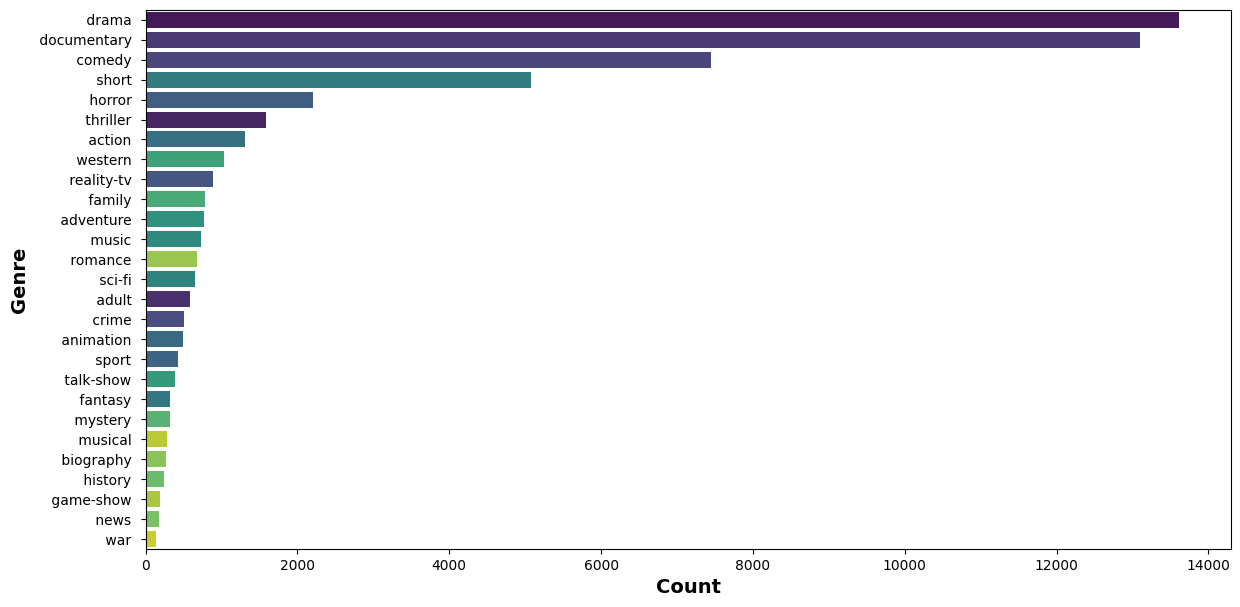

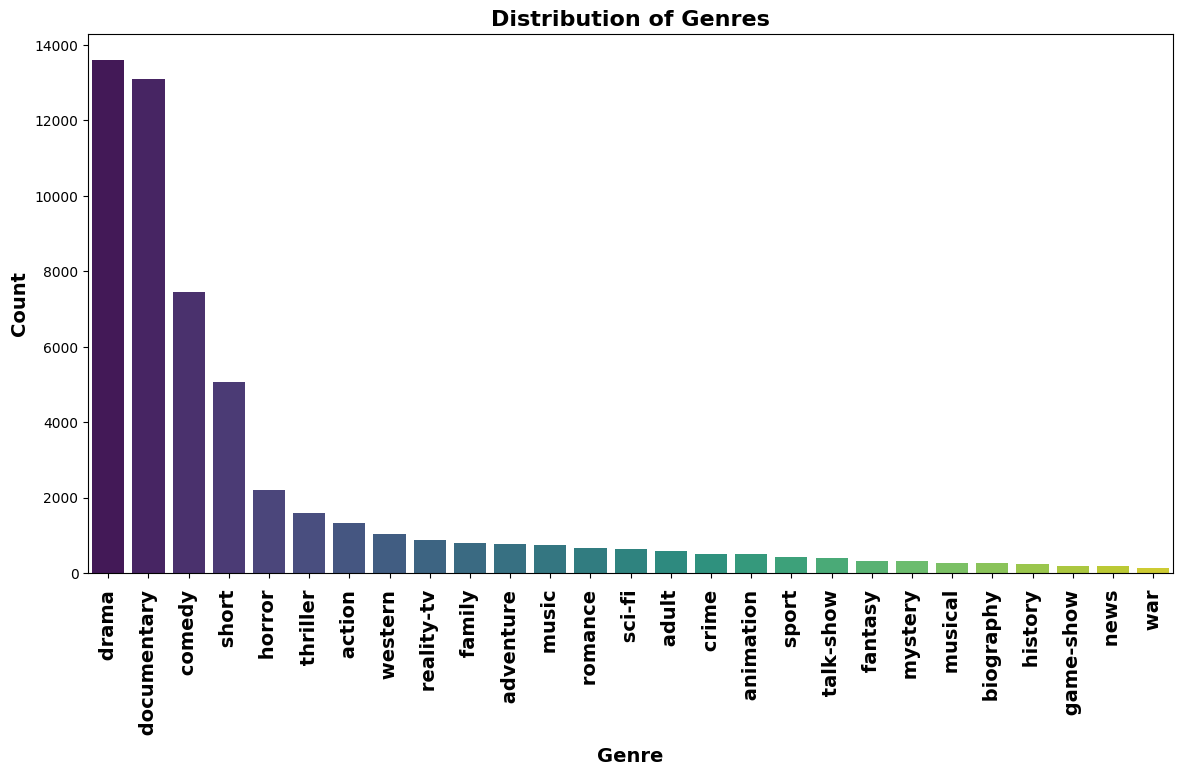

In [68]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis', hue='Genre', legend=False)
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis', hue=counts.index, legend=False)
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [83]:
import nltk
import os
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import re
import string

# Set the NLTK data path
nltk_data_path = os.path.join(os.getcwd(), 'nltk_data')
nltk.data.path.append(nltk_data_path)

# Download the required resources
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('punkt', download_dir=nltk_data_path)

[nltk_data] Downloading package stopwords to
[nltk_data]     d:\kuliah\semester-7\temu-kembali-
[nltk_data]     informasi\uts\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to d:\kuliah\semester-7\temu-
[nltk_data]     kembali-informasi\uts\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))    

# Define the clean_text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2]) #Use the stop_words variable you've assigned.
    text = re.sub(r"\s[\s]+", " ", text).strip()
    return text

# Apply the clean_text function
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\mrizk/nltk_data'
    - 'c:\\Python312\\nltk_data'
    - 'c:\\Python312\\share\\nltk_data'
    - 'c:\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\mrizk\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'D:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
    - 'd:\\kuliah\\semester-7\\temu-kembali-informasi\\uts\\nltk_data'
**********************************************************************


In [91]:
# Calculate the length of cleaned text
# train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].fillna('').apply(len)

# Visualize the distribution of text lengths

plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

KeyError: 'Text_cleaning'

In [50]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
x_train2 = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])
from sklearn.preprocessing import StandardScaler
x_train2=StandardScaler(with_mean=False).fit_transform(x_train)
# Transform the test data
x_test2 = tfidf_vectorizer.transform(test_data['Text_cleaning'])

KeyError: 'Text_cleaning'